In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import mailbox

# Step 1. Download your gmail mails and store them locally. 
# Please note that when you download the package from gmail, it contains different folders and files
# Find the file with mbox extension and refer in the path below

#mboxfile = "{local path to your mail file downloaded from gmail e.g. your_gmail_account.mbox}"
mboxfile = "mailbox.csv"
mbox = mailbox.mbox(mboxfile)
mbox

In [10]:
for key in mbox[0].keys():
    print(key)

In [12]:
import csv

In [13]:
# Step 2: Read each email from mbox file into a csv file with selected columns

with open('mailbox.csv', 'w', encoding="utf-8") as outputfile:
    writer = csv.writer(outputfile)
    writer.writerow(['subject','from','date','to','label','thread'])
    
    for message in mbox:
        writer.writerow([
        message['subject'], 
        message['from'], 
        message['date'], 
        message['to'], 
        message['X-Gmail-Labels'], 
        message['X-GM-THRID']
    ]
  )

In [14]:
# Step 3: Read csv into dataframe

dfs = pd.read_csv('mailbox.csv', names=['subject', 'from', 'date', 'to', 'label','thread'])

In [15]:
dfs.dtypes

subject    object
from       object
date       object
to         object
label      object
thread     object
dtype: object

In [16]:
dfs['date'] = pd.to_datetime(dfs['date'])

ParserError: Unknown string format: date present at position 0

In [45]:
dfs.dtypes

subject                 object
from                    object
date       datetime64[ns, UTC]
to                      object
label                   object
thread                  object
dtype: object

In [46]:
dfs

,subject,from,date,to,label,thread
0,subject,from,NaT,to,label,thread
1,Power BI Exchange Digest for Friday November 1...,Power Platform User Groups <DoNotReply@Connect...,2021-11-22 06:29:57+00:00,aniza.naeem@gmail.com,"Spam,Category Updates,Unread",1717108839166735390
2,Notifications & Updates for You: Python Commun...,Real Python <info@realpython.com>,2021-11-18 14:46:59+00:00,aniza.naeem@gmail.com,"Archived,Category Updates,Unread",1716777722154531873
3,=?UTF-8?q?=F0=9F=9A=80_NEW_Launch_Alert_-_Micr...,Whizlabs <krishnas@whizlabs.com>,2021-11-18 14:37:10+00:00,aniza.naeem@gmail.com,"Inbox,Category Promotions,Unread",1716777103840977996
4,iHeadHunt ApS is recruiting on behalf of Jabra...,Computerworld it-jobbank <mailservice@bounce.i...,2021-11-20 06:00:35+00:00,"""Aniza Naeem"" <aniza.naeem@gmail.com>","Archived,Category Updates,Unread",1716925796804252100
...,...,...,...,...,...,...
19575,"Billie Eilish Drawing, Dance Stretches and mor...","""=?utf-8?q?Pinterest?="" <pinterest-recommendat...",2020-05-11 17:41:28+00:00,"""Zoha"" <aniza.naeem@gmail.com>","Inbox,Category Promotions,Unread",1666416787142264541
19576,2 nye job: 'dynamics 365' dynamics365,Jobindex Jobagent <mailservice@jobindex.dk>,2021-10-11 05:05:16+00:00,aniza.naeem@gmail.com,"Inbox,Category Updates,Unread",1713298437677066063
19577,"Din jobagent ""Min =?UTF-8?Q?f=C3=B8rste?= joba...",Careerland <hello@graduateland.com>,2021-08-31 08:34:32+00:00,aniza.naeem@gmail.com,"Archived,Category Updates,Unread",1709597128290823880
19578,=?iso-8859-1?Q?Din_forskudsopg=F8relse_for_202...,Skattestyrelsen<TastSelv@tastselvperson.sktst.dk>,2020-11-18 16:59:53+00:00,aniza.naeem@gmail.com,"Inbox,Category Updates,Unread",1683718243047962927


In [47]:
# Data cleaning: Drop null values
dfs = dfs[dfs['date'].notna()]

In [48]:
dfs

,subject,from,date,to,label,thread
1,Power BI Exchange Digest for Friday November 1...,Power Platform User Groups <DoNotReply@Connect...,2021-11-22 06:29:57+00:00,aniza.naeem@gmail.com,"Spam,Category Updates,Unread",1717108839166735390
2,Notifications & Updates for You: Python Commun...,Real Python <info@realpython.com>,2021-11-18 14:46:59+00:00,aniza.naeem@gmail.com,"Archived,Category Updates,Unread",1716777722154531873
3,=?UTF-8?q?=F0=9F=9A=80_NEW_Launch_Alert_-_Micr...,Whizlabs <krishnas@whizlabs.com>,2021-11-18 14:37:10+00:00,aniza.naeem@gmail.com,"Inbox,Category Promotions,Unread",1716777103840977996
4,iHeadHunt ApS is recruiting on behalf of Jabra...,Computerworld it-jobbank <mailservice@bounce.i...,2021-11-20 06:00:35+00:00,"""Aniza Naeem"" <aniza.naeem@gmail.com>","Archived,Category Updates,Unread",1716925796804252100
5,=?UTF-8?Q?Nyt_match_p=C3=A5_dit_=C3=B8nske?=,"""Nybolig"" <email@info.nybolig.dk>",2021-11-23 15:20:27+00:00,"""Aniza"" <aniza.naeem@gmail.com>","Inbox,Category Updates,Unread",1717233047818521105
...,...,...,...,...,...,...
19575,"Billie Eilish Drawing, Dance Stretches and mor...","""=?utf-8?q?Pinterest?="" <pinterest-recommendat...",2020-05-11 17:41:28+00:00,"""Zoha"" <aniza.naeem@gmail.com>","Inbox,Category Promotions,Unread",1666416787142264541
19576,2 nye job: 'dynamics 365' dynamics365,Jobindex Jobagent <mailservice@jobindex.dk>,2021-10-11 05:05:16+00:00,aniza.naeem@gmail.com,"Inbox,Category Updates,Unread",1713298437677066063
19577,"Din jobagent ""Min =?UTF-8?Q?f=C3=B8rste?= joba...",Careerland <hello@graduateland.com>,2021-08-31 08:34:32+00:00,aniza.naeem@gmail.com,"Archived,Category Updates,Unread",1709597128290823880
19578,=?iso-8859-1?Q?Din_forskudsopg=F8relse_for_202...,Skattestyrelsen<TastSelv@tastselvperson.sktst.dk>,2020-11-18 16:59:53+00:00,aniza.naeem@gmail.com,"Inbox,Category Updates,Unread",1683718243047962927


In [83]:
dfs.to_csv('gmail.csv')

In [84]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19554 entries, 2021-11-22 06:29:57+00:00 to 2021-11-11 22:30:31+00:00
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   subject    19526 non-null  object             
 1   from       19554 non-null  object             
 2   date       19554 non-null  datetime64[ns, UTC]
 3   to         18829 non-null  object             
 4   label      19554 non-null  object             
 5   thread     19554 non-null  object             
 6   dayofweek  19554 non-null  object             
 7   timeofday  19554 non-null  float64            
 8   hour       19554 non-null  int64              
 9   year_int   19554 non-null  int64              
 10  year       19554 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(6)
memory usage: 1.8+ MB


In [85]:
import re

In [86]:
# regular expression to extract email address from 'From' column e.g. Casper Jensen <casper.jensen@somemail.com>
def extract_email_ID(string):
  email = re.findall(r'<(.+?)>', string)
  if not email:
    email = list(filter(lambda y: '@' in y, string.split()))
  return email[0] if email else np.nan

In [ ]:
dfs['from'] = dfs['from'].apply(lambda x: extract_email_ID(x))

In [103]:
# Applly label as 'sent' or 'receive'
myemail = 'aniza.naeem@gmail.com'
dfs['label'] = dfs['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')

<ipython-input-103-5030fb5f13c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['label'] = dfs['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')


In [54]:
import datetime 
import pytz

def refactor_timezone(x):
  eu = pytz.timezone('EU')
  return x.astimezone(eu)

In [ ]:
dfs['dayofweek'] = dfs['date'].apply(lambda x: x.day_name())
#dfs['dayofweek'] = pd.Categorical(dfs['dayofweek'], categories=[
 #   'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
  #  'Saturday', 'Sunday'], ordered=True)
dfs['dayofweek']

In [ ]:
dfs['timeofday'] = dfs['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)
dfs['timeofday']

In [ ]:
dfs['hour'] = dfs['date'].apply(lambda x: x.hour)
dfs['hour']

In [ ]:
dfs['year_int'] = dfs['date'].apply(lambda x: x.year)
dfs['year_int']

In [ ]:
dfs['year'] = dfs['date'].apply(lambda x: x.year + x.dayofyear/365.25)
dfs['year']

In [60]:
dfs

,subject,from,date,to,label,thread,dayofweek,timeofday,hour,year_int,year
1,Power BI Exchange Digest for Friday November 1...,DoNotReply@ConnectedCommunity.org,2021-11-22 06:29:57+00:00,aniza.naeem@gmail.com,inbox,1717108839166735390,Monday,6.499167,6,2021,2021.892539
2,Notifications & Updates for You: Python Commun...,info@realpython.com,2021-11-18 14:46:59+00:00,aniza.naeem@gmail.com,inbox,1716777722154531873,Thursday,14.783056,14,2021,2021.881588
3,=?UTF-8?q?=F0=9F=9A=80_NEW_Launch_Alert_-_Micr...,krishnas@whizlabs.com,2021-11-18 14:37:10+00:00,aniza.naeem@gmail.com,inbox,1716777103840977996,Thursday,14.619444,14,2021,2021.881588
4,iHeadHunt ApS is recruiting on behalf of Jabra...,mailservice@bounce.it-jobbank.dk,2021-11-20 06:00:35+00:00,"""Aniza Naeem"" <aniza.naeem@gmail.com>",inbox,1716925796804252100,Saturday,6.009722,6,2021,2021.887064
5,=?UTF-8?Q?Nyt_match_p=C3=A5_dit_=C3=B8nske?=,email@info.nybolig.dk,2021-11-23 15:20:27+00:00,"""Aniza"" <aniza.naeem@gmail.com>",inbox,1717233047818521105,Tuesday,15.340833,15,2021,2021.895277
...,...,...,...,...,...,...,...,...,...,...,...
19575,"Billie Eilish Drawing, Dance Stretches and mor...",pinterest-recommendations@ideas.pinterest.com,2020-05-11 17:41:28+00:00,"""Zoha"" <aniza.naeem@gmail.com>",inbox,1666416787142264541,Monday,17.691111,17,2020,2020.361396
19576,2 nye job: 'dynamics 365' dynamics365,mailservice@jobindex.dk,2021-10-11 05:05:16+00:00,aniza.naeem@gmail.com,inbox,1713298437677066063,Monday,5.087778,5,2021,2021.777550
19577,"Din jobagent ""Min =?UTF-8?Q?f=C3=B8rste?= joba...",hello@graduateland.com,2021-08-31 08:34:32+00:00,aniza.naeem@gmail.com,inbox,1709597128290823880,Tuesday,8.575556,8,2021,2021.665298
19578,=?iso-8859-1?Q?Din_forskudsopg=F8relse_for_202...,TastSelv@tastselvperson.sktst.dk,2020-11-18 16:59:53+00:00,aniza.naeem@gmail.com,inbox,1683718243047962927,Wednesday,16.998056,16,2020,2020.884326


In [61]:
dfs.index = dfs['date']
dfs.index 

DatetimeIndex(['2021-11-22 06:29:57+00:00', '2021-11-18 14:46:59+00:00',
               '2021-11-18 14:37:10+00:00', '2021-11-20 06:00:35+00:00',
               '2021-11-23 15:20:27+00:00', '2021-11-22 22:31:00+00:00',
               '2021-11-24 07:30:57+00:00', '2021-11-22 11:36:27+00:00',
               '2021-11-17 12:55:24+00:00', '2021-11-17 23:17:14+00:00',
               ...
               '2021-09-22 12:10:11+00:00', '2021-09-14 16:18:05+00:00',
               '2021-10-19 05:00:16+00:00', '2021-06-04 05:29:43+00:00',
               '2021-04-18 05:06:16+00:00', '2020-05-11 17:41:28+00:00',
               '2021-10-11 05:05:16+00:00', '2021-08-31 08:34:32+00:00',
               '2020-11-18 16:59:53+00:00', '2021-11-11 22:30:31+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=19554, freq=None)

##### Data analysis

In [62]:
#Calculate number of emails
print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))

print(dfs['label'].value_counts())

Thu, 12 Dec 2013 11:53 AM
Wed, 24 Nov 2021 03:04 PM
inbox    18650
sent       904
Name: label, dtype: int64


In [63]:
#create sapertate dataframes for sent and recieve mails 
sent = dfs[dfs['label']=='sent']
sent_col=sent.label
sent_date=sent.date
sent_time=sent.timeofday


received = dfs[dfs['label']=='inbox']
received_col=received.label
received_date=received.date
received_time=received.timeofday


<AxesSubplot:xlabel='year_int', ylabel='No of mails'>

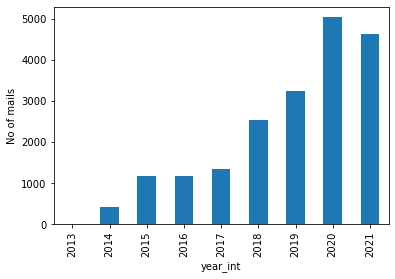

In [101]:
mails_per_year=[]
mails_per_year=dfs.groupby("year_int")

plt.ylabel("No of mails")

newdataset = mails_per_year.size()
newdataset.plot(kind="bar")



<AxesSubplot:ylabel='None'>

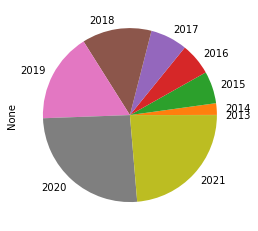

In [65]:
newdataset.plot(kind="pie")


In [66]:
np.percentile(newdataset, 50)

1343.0

In [67]:
i=newdataset.quantile([0.05, 0.25, 0.5, 0.9])
i

0.05     172.4
0.25    1168.0
0.50    1343.0
0.90    4708.8
dtype: float64

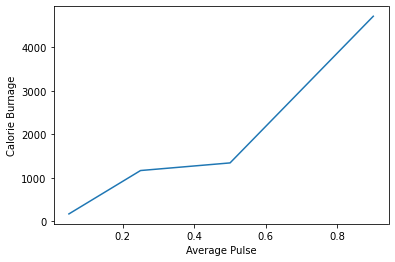

In [99]:
i.T.plot(subplots=True)
plt.xlabel("Average Pulse")
plt.ylabel("Calorie Burnage")

plt.show()

In [73]:
mail_count=mails_per_year.agg({'year_int' : 'count'})
#mail_count
result_mean=np.mean(mail_count, axis=0)
result_mean

year_int    2172.666667
dtype: float64

In [74]:
result_std=np.std(mail_count, axis=0)
result_std

year_int    1699.070465
dtype: float64

In [75]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy import ndimage
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

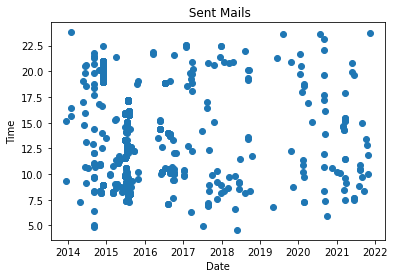

In [76]:
plt.scatter(sent.date, sent_time)
plt.title(' Sent Mails')
plt.xlabel('Date')
plt.ylabel('Time')
plt.show()


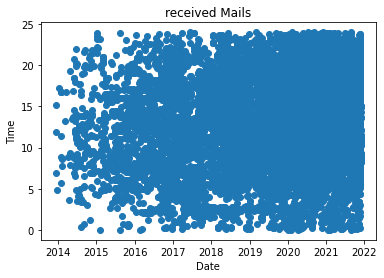

In [77]:
plt.scatter(received.date, received_time)
plt.title('received Mails')
plt.xlabel('Date')
plt.ylabel('Time')
plt.show()


<AxesSubplot:>

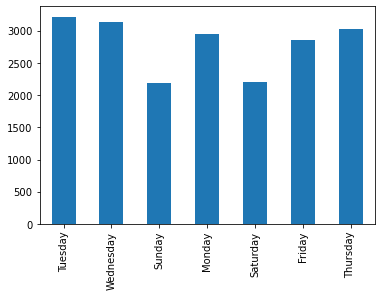

In [78]:
#Average emails per day
counts = dfs.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

In [79]:
sdw = sent.groupby('dayofweek').size() / len(sent)
rdw = received.groupby('dayofweek').size() / len(received)
sdw

dayofweek
Friday       0.092920
Monday       0.267699
Saturday     0.237832
Sunday       0.030973
Thursday     0.154867
Tuesday      0.110619
Wednesday    0.105088
dtype: float64

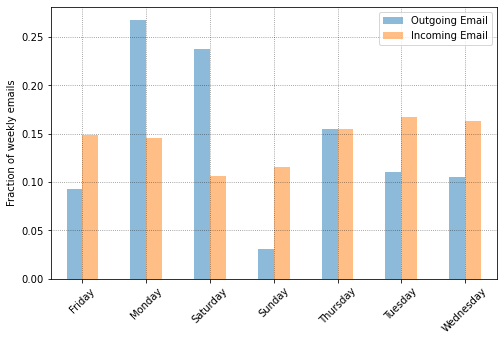

In [80]:
df_tmp = pd.DataFrame(data={'Outgoing Email': sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

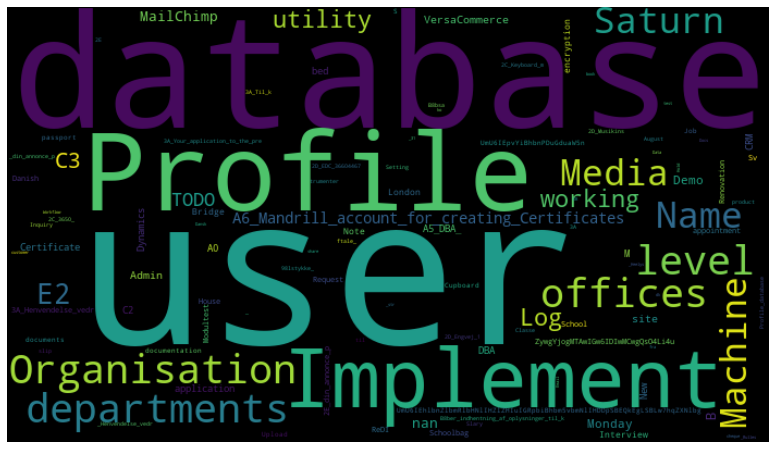

In [114]:
#Most frequently used words
from wordcloud import WordCloud 

stopwords = ['Re', 'Fwd', '3A_','Q','Email_address','where_certificates_should_be_sent_to','utf']
wrd = WordCloud(width=700, height=400, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)

plt.figure(figsize=(20,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

<AxesSubplot:xlabel='hour', ylabel='No of mails'>

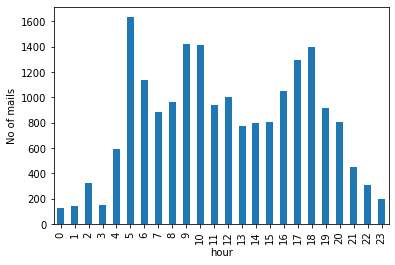

In [122]:
mails_per_day=[]
mails_per_day=dfs.groupby("hour")

plt.ylabel("No of mails")

newdataset1 = mails_per_day.size()
newdataset1.plot(kind="bar")


In [138]:
from datetime import date
from datetime import datetime
d0 = date(2013, 12, 12)
d1 = date(2021, 11, 24)
delta = d1 - d0
print(delta.days)
inbox=18650
sent=904
average_inbox=inbox/delta.days
average_sent=sent/delta.days
print("Average number of mails receive per day:",average_inbox)
print("Average number of mails sent per day:",average_sent)
#delta.strftime('%Y-%m-%d')

2904
Average number of mails receive per day: 6.422176308539945
Average number of mails sent per day: 0.31129476584022037


In [118]:
def plot_number_perday_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):
    year = df[df['year'].notna()]['year'].values
    T = year.max() - year.min()
    bins = int(T / dt)
    weights = 1 / (np.ones_like(year) * dt * 365.25)
    ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);
    ax.grid(ls=':', color='k')


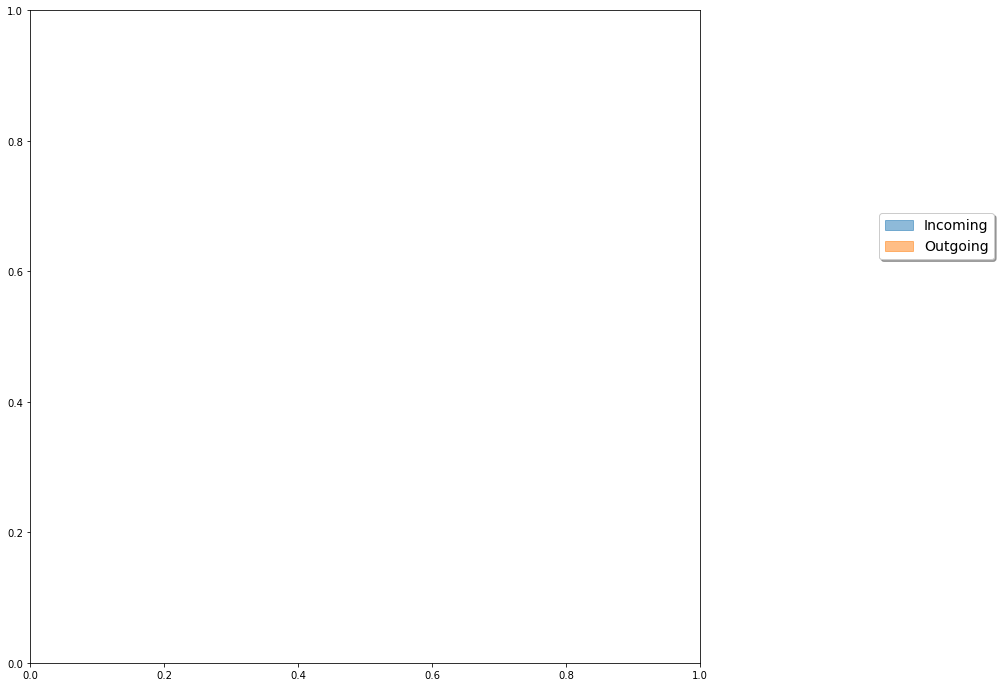

In [121]:
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

plt.figure(figsize=(12,12));
#tpl = TriplePlot()

#tpl.plot(received, color='C0', alpha=0.5)
#tpl.plot(sent, color='C1', alpha=0.5)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.5)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.5)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=14, shadow=True);

presentation

Tutorial: Python Regex (Regular Expressions) for Data Scientists
Published: January 7, 2020
Diving headlong into data sets is a part of the lesson for anyone working in data science. Often, this means number-crunching, but what do we do when our data set is primarily text-based? We can use regular expressions. In this tutorial, we’re going to take a closer look at how to use regular expressions (regex) in Python.

Regular expressions (regex) are essentially text patterns that you can use to automate searching through and replacing elements within strings of text. This can make cleaning and working with text-based data sets much easier, saving you the trouble of having to search through mountains of text by hand.



Common Python Regex Patterns
The pattern we used with re.findall() above contains a fully spelled-out out string, "From:". This is useful when we know precisely what we’re looking for, right down to the actual letters and whether or not they’re upper or lower case. If we don’t know the exact format of the strings we want, we’d be lost. Fortunately, regex has basic patterns that account for this scenario. Let’s look at the ones we use in this tutorial:

w matches alphanumeric characters, which means a-z, A-Z, and 0-9. It also matches the underscore, _, and the dash, -.
d matches digits, which means 0-9.
s matches whitespace characters, which include the tab, new line, carriage return, and space characters.
S matches non-whitespace characters.
. matches any character except the new line character n.
With these regex patterns in hand, you’ll quickly understand our code above as we go on to explain it.

In [41]:
fh = open(r"gmail.csv", "r").read()


In [44]:
#for line in fh.split("n"):
 #   if "From:" in line:
  #      print(line)
match=re.findall("From:.*", fh)
match

['From: Us! The eBay item the world is looking at today...","""eBay"" <ebay@reply.ebay.co.uk>",2017-04-30 11:22:36+00:00,"""aniznaee-0"" <aniza.naeem@gmail.com>","Archived,Important,Opened,Category Promotions",1566102107999042332',
 'From: Us...These products are popular!","""eBay"" <ebay@reply.ebay.co.uk>",2017-08-13 12:46:49+00:00,"""aniznaee-0"" <aniza.naeem@gmail.com>","Archived,Opened,Category Promotions",1575620089552289598',
 'From: Us... The six top trends today are...",eBay <eBay@reply.ebay.co.uk>,2017-01-14 17:19:01+00:00,aniza.naeem@gmail.com,"Archived,Important,Opened,Category Promotions",1556521258552933094',
 'From: Us ... Be tempted by our offers before they disappear! You\'ll love these, check them out.","""eBay"" <ebay@reply.ebay.co.uk>",2017-03-07 19:29:47+00:00,"""aniznaee-0"" <aniza.naeem@gmail.com>","Archived,Important,Opened,Category Promotions",1561240523556185151',
 'From: Us... The six top trends today are...",eBay <eBay@reply.ebay.co.uk>,2017-02-04 13:45:40+00

In [43]:

for line in re.findall("From:.*", fh):
    print(line)

From: Us! The eBay item the world is looking at today...","""eBay"" <ebay@reply.ebay.co.uk>",2017-04-30 11:22:36+00:00,"""aniznaee-0"" <aniza.naeem@gmail.com>","Archived,Important,Opened,Category Promotions",1566102107999042332
From: Us...These products are popular!","""eBay"" <ebay@reply.ebay.co.uk>",2017-08-13 12:46:49+00:00,"""aniznaee-0"" <aniza.naeem@gmail.com>","Archived,Opened,Category Promotions",1575620089552289598
From: Us... The six top trends today are...",eBay <eBay@reply.ebay.co.uk>,2017-01-14 17:19:01+00:00,aniza.naeem@gmail.com,"Archived,Important,Opened,Category Promotions",1556521258552933094
From: Us ... Be tempted by our offers before they disappear! You'll love these, check them out.","""eBay"" <ebay@reply.ebay.co.uk>",2017-03-07 19:29:47+00:00,"""aniznaee-0"" <aniza.naeem@gmail.com>","Archived,Important,Opened,Category Promotions",1561240523556185151
From: Us... The six top trends today are...",eBay <eBay@reply.ebay.co.uk>,2017-02-04 13:45:40+00:00,aniza.naeem@gma